In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Housing.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.shape

(21613, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

#### Columns:
1. id - Unique identifier for each property
2. date - Date of property listing
3. price - Property price in currency
4. bedrooms - Number of bedrooms
5. bathrooms - Number of bathrooms
6. sqft_living - Living area size in square feet
7. sqft_lot - Total lot size in square feet
8. floors - Number of floors
9. waterfront - Indicates if property has waterfront view (0 for no, 1 for yes).
10. view - Quality level of property view (0 to 4)
11. condition - Overall condition rating (1 to 5)
12. grade - Overall grade rating (1 to 13)
13. sqft_above - Living area above ground level in square feet
14. sqft_basement - Basement area in square feet
15. yr_built - Year property was built
16. yr_renovated - Year property was last renovated (0 if never)
17. zipcode - Property location zip code
18. lat - Latitude coordinate of property location
19. long - Longitude coordinate of property location
20. sqft_living15 - Living area size of 15 nearest properties in square feet
21. sqft_lot15 - Lot size of 15 nearest properties in square feet

In [6]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [9]:
df['date'] = pd.to_datetime(df['date'])

In [39]:
df['date'].dt.year.value_counts()

date
2014    14633
2015     6980
Name: count, dtype: int64

In [38]:
df['yr_built'] = pd.to_datetime(df['date'])

In [40]:
df['yr_built'].dt.year.value_counts()

yr_built
2014    14633
2015     6980
Name: count, dtype: int64

In [18]:
df['zipcode'].nunique()

70

In [19]:
dfnums = df.select_dtypes(include='number')

In [20]:
dfnums.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,231300.0,2,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [29]:
dfnums.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

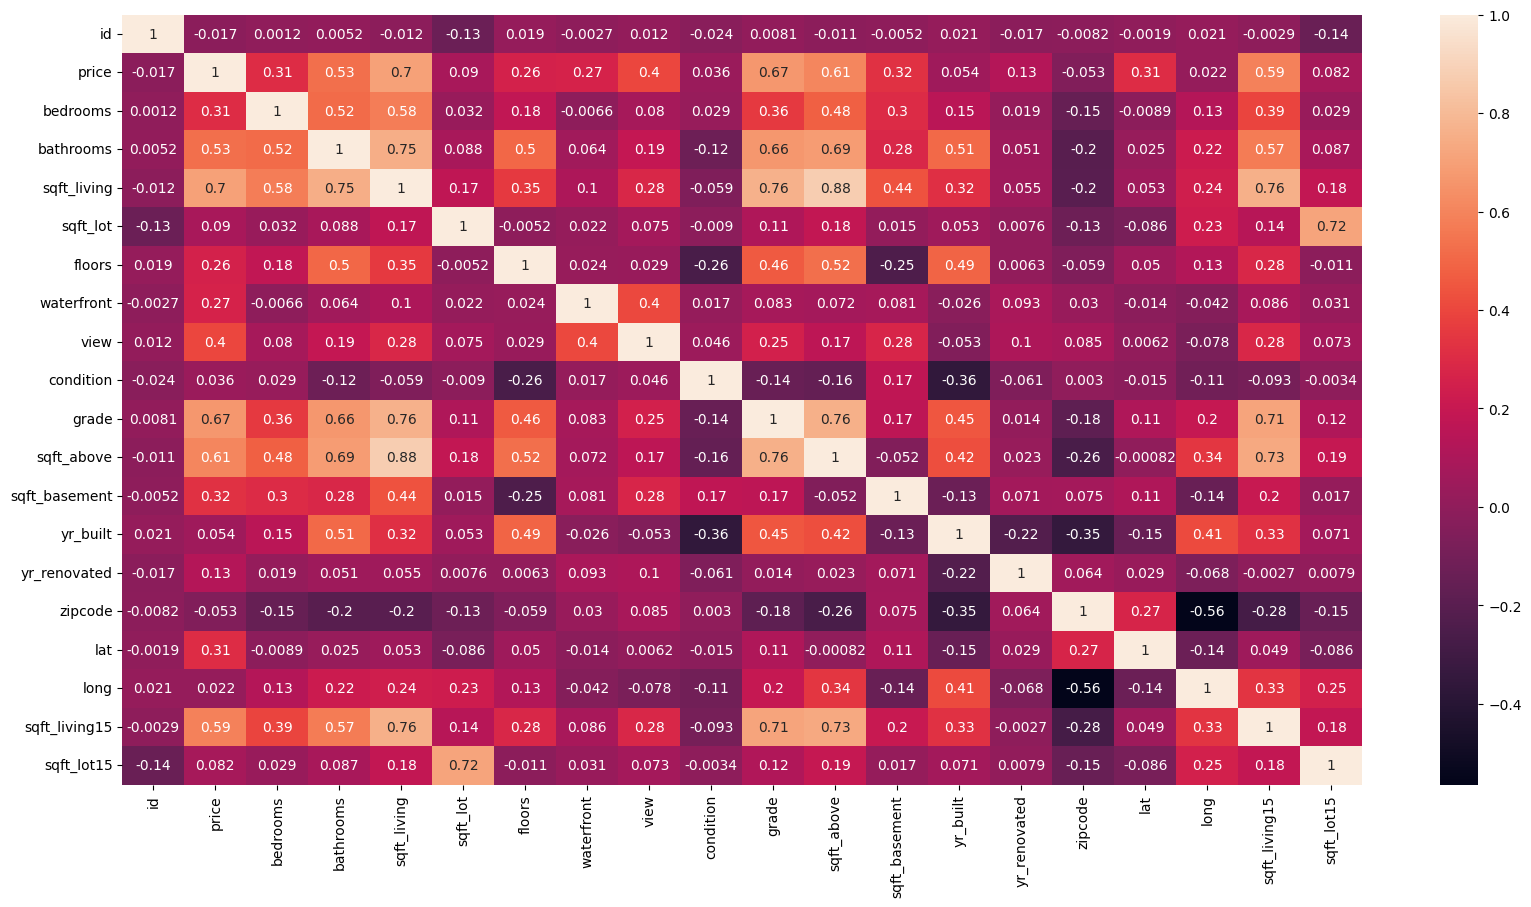

In [28]:
plt.figure(figsize=(20,10))
sns.heatmap(dfnums.corr(), annot=True)
plt.show()

In [42]:
dfnums['bedrooms'].value_counts().sort_index()

bedrooms
0       13
1      199
2     2761
3     9823
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

In [44]:
dfnums['bathrooms'].nunique()

30

In [35]:
dfnums['floors'].value_counts()

floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64

In [31]:
dfnums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

#### Analysis of numerical columns
1. id - can be dropped
2. price - outcome variable
3. bedrooms - feature
4. bathrooms - feature
5. sqft_living - potential strong feature
6. sqft_lot - candidate feature
7. floors - candidate feature
8. waterfront - feature, requires conversion to boolean to preserve nominal propertry
9. view - feature, ordinal nature
10. condition - feature, ordinal nature
11. grade - potential strong feature, ordinal nature
12. sqft_above - potential strong feature
13. sqft basement - candidate feature
14. yr_built - feature, feature engineering of year
15. yr_renovated - candidate feature, feature engineering required
16. zipcode - candiate feature, requires conversion to categorical feature and one hot encoding to preserve nominal property
17. lat - can be dropped
18. lat - can be dropped
19. sqft_living15 - potential strong feature
20. sqft_lot15 - candidate feature